# DETECCION DE OUTLIERS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
posibles_variables_con_outliers = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,58.268941,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,19.018368,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,0.000000,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,45.000000,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,60.000000,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,73.000000,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,118.000000,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


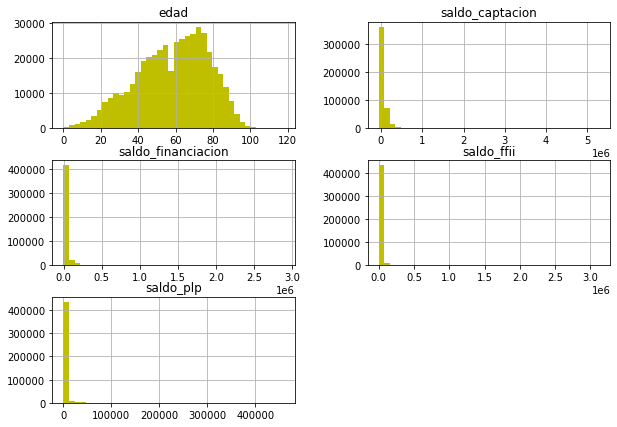

In [5]:
# Variable ffii. No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en ffii.
# Variable plp.  No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en plp.
# Variable Captacion. No tiene outliers. Son valores reales. Solamente modificamos los negativos a la media.
# Variable saldo Fin. No tiene outliers. Son valores reales.Solamente modificamos los negativos a la media
# Variable edad. Es la unica que puede tener ouliers reales.  Estidiamos y esos ouliers le damos valor de media.
posibles_variables_con_outliers.hist(figsize = (10,7), color = 'y', bins = 40);
posibles_variables_con_outliers.describe()

# OUTLIER EDAD

Boxplot edad


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

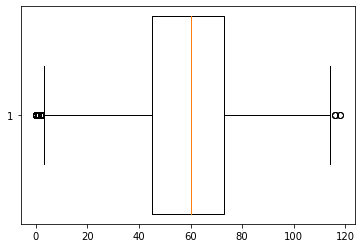

In [11]:
# Hacemos una primera visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False,widths = 2)
plt.show   
df['edad'].describe()

In [12]:
print ('Cuartiles edad')
print('='*30)
Q1 = df['edad'].quantile(0.25)
print ('Primer cuartil',Q1)
print('='*30)
Q3 = df['edad'].quantile(0.75)
print ('Tercer cuartil',Q3)
print('='*30)
rangointercuartil = (Q3 - Q1)
print ('Rango_intercuartil',rangointercuartil)
print('='*30)
mediana = df['edad'].median()
print ('Mediana', mediana)
print('='*30)
minimo = df['edad'].min()
print ('Minimo', minimo)
print('='*30)
maximo = df['edad'].max()
print ('Maximo', maximo)

Cuartiles edad
Primer cuartil 45.0
Tercer cuartil 73.0
Rango_intercuartil 28.0
Mediana 60.0
Minimo 0.0
Maximo 118.0


In [13]:
#sacamos los extremos superiores e inferiores de los bigotes
print('='*30)
extremo_inferior = Q1 - 1.5 * rangointercuartil
print ('Extremo bigote_inferior', extremo_inferior)
print('='*30)
extremo_superior = Q3 + 1.5 * rangointercuartil
print ('Extremo bigote_superior', extremo_superior)
print('='*30)

Extremo bigote_inferior 3.0
Extremo bigote_superior 115.0


In [14]:
#detectamos los outliers
ubicacion_outliers = (df['edad'] < extremo_inferior) | (df['edad'] > extremo_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [15]:
outliers = df['edad'][ubicacion_outliers]
outliers.count()
#print ('lista_outliers',outlier)

254

In [16]:
#detectamos tambien los NO outliers
resto_datos_no_outliers = (df['edad'] >= extremo_inferior) & (df['edad'] <= extremo_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [17]:
no_outliers = df['edad'][resto_datos_no_outliers]
no_outliers.count()
#print ('lista_ubicacion_sin_outliers',sin_outlier)

451120

In [18]:
# No queremos eliminar los outliers ya que son muy pocos vs todo el df. Los transformamos a la media de edad
df[(df['edad']<3) | (df['edad']>=115)] = df['edad'].mean()

Boxplot edad


count    451374.000000
mean         58.299586
std          18.970610
min           3.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         114.000000
Name: edad, dtype: float64

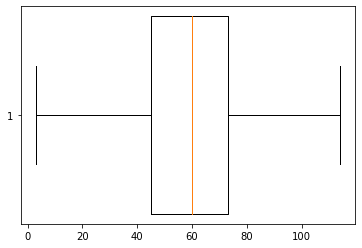

In [19]:
# Volvemos a hacer la  visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

#  SALDO CAPTACION

In [20]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971323e+04
std      8.792428e+04
min     -5.104332e+04
25%      1.809365e+03
50%      1.520690e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [25]:
# Hay 9439 clientes con saldo negativo . Solo el 2%
df[df['saldo_captacion'] < 0]['cliente'].nunique()

9439

In [33]:
df['cliente'].count()

451374

In [36]:
df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()

0.020911705149166765

In [59]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [58]:
# Sacamos nuvamente datos estadisticos..
df['saldo_captacion'].describe()

count    4.513740e+05
mean     5.061069e+04
std      8.713412e+04
min      0.000000e+00
25%      2.186115e+03
50%      1.761814e+04
75%      6.427437e+04
max      5.096383e+06
Name: saldo_captacion, dtype: float64

#  SALDO FINANCIACION

In [51]:
# No queremos los valores negativos. Les damos valor de media.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.457941e+04
std      4.288681e+04
min     -4.900000e+03
25%      0.000000e+00
50%      9.550000e+00
75%      9.892050e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

In [52]:
# Hay 9439 clientes con saldo negativo . Solo el 2%
df[df['saldo_financiacion'] < 0]['cliente'].nunique()

696

In [53]:
df['cliente'].count()

451374

In [54]:
df[df['saldo_financiacion'] < 0]['cliente'].nunique() / df['cliente'].count()

0.0015419585532175093

In [55]:
df[df['saldo_financiacion'] < 0] = 0

In [56]:
# No queremos los valores negativos. Les damos valor de cero.
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.457975e+04
std      4.288669e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.550000e+00
75%      9.892050e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64